## Titanic Dataset Exploration and Prediction

### Importing the necessary library

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Preparation
- In this section, we will load the data from the csv file called 'titanic.csv'.
- Look at the head of the Dataframe and some information provided by dataframe.

In [72]:
# Load the data
dataset = pd.read_csv('data/titanic.csv')
display(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Cleaning
- In this section, we will clean the data by adjusting default data types if it is wrong, check for null values, remove features etc.

- Lets start by look at null values in the dataset

In [73]:
print('Total observations in the Dataset are: ', dataset.shape[0])
null_values = dataset.isnull().sum()
null_values[null_values!=0]

Total observations in the Dataset are:  891


Age         177
Cabin       687
Embarked      2
dtype: int64

- From the result we can see that the Cabin columns is 77% empty, so we will not keep the Cabin column for further use.
- We will also remove rows where embarked is null

In [74]:
dataset.drop(columns=['Cabin'], inplace=True)
dataset.dropna(subset=['Embarked'], inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Now lets select the columns of interest and remove the columns which are of no help.
    - Output produced by info method we can say that Ticket and Fare has no use because, in matters of survival ticket and fare does not contribution whether you'll survive or not. So we will remove Ticket and Fare column.
    - Name column also doesnt matter because, survival of the person does not depend on name of the person. But before dropping the whole column we will check are there any entries of same person recorded twice.

In [75]:
# Dropping Names, Ticket, Fare columns and keepin rest of the columns for analysis and cleaning
dataset.drop(columns=['Name', 'Ticket', 'Fare', 'PassengerId'], inplace= True)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


- As we can see from the info() method, we need to Clean and fix some datatypes of the columns
    - Sex, Embarked, Pclass and Survived column is a categorical variable.

In [77]:
# Fixing Sex column
dataset['Sex'] = dataset.Sex.astype('category')

# Fixing Embarked column
dataset['Embarked'] = dataset.Embarked.astype('category')

# Fixing PClass and giving Pclass an order.
catsDtype = pd.api.types.CategoricalDtype(categories= [3, 2, 1], ordered=True)
dataset['Pclass'] = dataset.Pclass.astype(catsDtype)

# Fixing Survived Column
dataset['Survived'] = dataset.Survived.astype('category')

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       712 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Embarked  889 non-null    category
dtypes: category(4), float64(1), int64(2)
memory usage: 31.6 KB


- Now we have fixed the datatypes of columns, Lets do some analysis
    - Check weather the data is consistent or not

In [79]:
# Describing the dataset
display(dataset.describe())
display(dataset[['Pclass', 'Sex', 'Embarked', 'Survived']].describe())

,Age,SibSp,Parch
count,712.000000,889.000000,889.000000
mean,29.642093,0.524184,0.382452
std,14.492933,1.103705,0.806761
min,0.420000,0.000000,0.000000
25%,20.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000
max,80.000000,8.000000,6.000000


,Pclass,Sex,Embarked,Survived
count,889,889,889,889
unique,3,2,3,2
top,3,male,S,0
freq,491,577,644,549


- From the above output dataset values are consistent in nature. i.e Age, SibSp, Parch is not negative
- As for categorical variable they are also consistent

*Note : How to Judge weather the catogories are consistent or not ?*
- Check for the values you would expect in the given columns.
- Eg : Embarked column have 3 different ports where the ship stopped. If there is a place where ship didn't went then thats inconsistent

- Lets fix null values in the Age column

In [80]:
dataset['Age'].fillna(dataset.Age.median(), inplace=True)

- We have extracted the dataset rows where Age value is null.
- In order to fill the null values in the dataset, we need to decide what might be the age group of the person by looking the number of SibSp and Parch. After doing this we need to fill the values based on SibSp and Parch. This wouldn't effect much.
- Alternative, fill the null Age values with Median age.

In [86]:
print('Dataset with Age values :')
display(dataset.groupby(['Parch', 'SibSp'])['Age'].median().unstack())
print('\nDataset with no Age values :')
display(no_age_dataset.groupby(['Parch'])['SibSp'].value_counts().unstack())

Dataset with Age values :


SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,28.0,28.0,28.0,31.5,NaN,NaN,NaN
1,27.5,29.0,4.0,28.0,7.0,NaN,NaN
2,24.0,25.0,19.5,10.0,6.0,11.0,28.0
3,24.0,48.0,24.0,NaN,NaN,NaN,NaN
4,29.0,45.0,NaN,NaN,NaN,NaN,NaN
5,40.0,39.0,NaN,NaN,NaN,NaN,NaN
6,NaN,43.0,NaN,NaN,NaN,NaN,NaN



Dataset with no Age values :


SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


- Interesting Observation is that, out of 177 people 157 people have no Parch and (0,1,2) SibSp.
- So it is reasonable to fill all the null values in the age column with median because 88% of the people have 0 Parch or have (0,1,2) SibSp

### 3. Data Analysis

- The Most crucial part: Understanding of the data.
- In this section we will try to understand the story that the data is telling.
- Asking right questions, will lead to the better understanding of the data.

#### 3.1. One Variable analysis on the Data
- Lets analyse each column one by one by plotting graph.

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Embarked  889 non-null    category
dtypes: category(4), float64(1), int64(2)
memory usage: 31.6 KB


- From the inforation about the dataset we have, 
    - Categorical Data : Survived, Pclass, Sex and Embarked
    - Countinous data : Age
    - Discrete data : SibSp, Parch

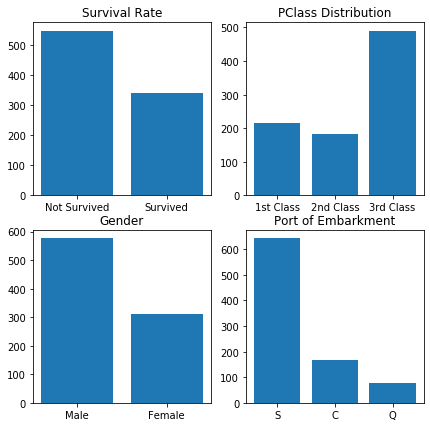

In [141]:
# Part 1 : Categorical Data : Survived, Pclass, Sex and Embarked
fig, ax = plt.subplots(2, 2, squeeze=False)
ax[0, 0].bar(['Not Survived','Survived'], dataset['Survived'].value_counts())
ax[0, 1].bar(['1st Class','2nd Class','3rd Class'], dataset['Pclass'].value_counts().sort_index(ascending=False), label='Passenge')
ax[1, 0].bar(['Male','Female'], dataset['Sex'].value_counts())
ax[1, 1].bar(['S', 'C', 'Q'], dataset['Embarked'].value_counts())
ax[0, 0].set_title('Survival Rate')
ax[0, 1].set_title('PClass Distribution')
ax[1, 0].set_title('Gender')
ax[1, 1].set_title('Port of Embarkment')
fig.set_size_inches(7,7)
plt.show()

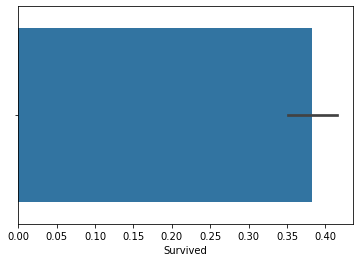

In [153]:
## Seaboarn Version

# fig, ax = plt.subplots(2, 2, squeeze=False)
# ax[0, 0] = sns.bar([0,1], dataset['Survived'].value_counts())
# ax[0, 1].bar([1,2,3], dataset['Pclass'].value_counts().sort_index(ascending=False), label='Passenge')
# ax[1, 0].bar([0,1], dataset['Sex'].value_counts())
# ax[1, 1].bar(['S', 'C', 'Q'], dataset['Embarked'].value_counts())
# ax[0, 0].set_title('Survival Rate')
# ax[0, 1].set_title('PClass Distribution')
# ax[1, 0].set_title('Gender')
# ax[1, 1].set_title('Port of Embarkment')
# fig.set_size_inches(18.5, 10.5)

In [146]:
? sns.catplot